In [ ]:
#Brittany Toy

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


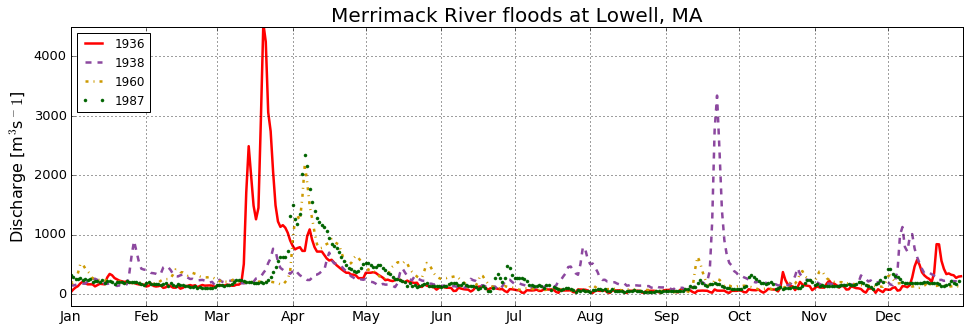

In [23]:
# 1 Basic Line Plotting
f = open('../python4geosciences/data/merrimack_discharge.dat')
data1936 = []
data1938 = []
data1960 = []
data1987 = []
for line in f.readlines():
    if line[0] == '#':continue 
    data = line.split()
    if data[0] == 'USGS':
        a = data[2].split('-')
        if a[0] == '1936':
            data1936.append(float(data[3])/35.315)
        if a[0] == '1938':
            data1938.append(float(data[3])/35.315)
        if a[0] == '1960':
            data1960.append(float(data[3])/35.315)
        if a[0] == '1987':
            data1987.append(float(data[3])/35.315)
f = plt.figure(figsize = (16,5))
ax = f.add_subplot(111)
ax.plot(data1936, 'r', label = '1936', linewidth = 2.5)
ax.plot(data1938, '--', color = '#8C489F', label = '1938', linewidth = 2.5)
ax.plot(data1960, '-.', color = '#CC9900', label = '1960', linewidth = 2.5)
ax.plot(data1987, '.', label = '1987', color = '#006400', linewidth = 2)
ax.set_ylim(-200,4500)
ax.set_xlim(0,366)
plt.xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 14)
plt.yticks([0,1000,2000,3000,4000], fontsize = 13)
ax.set_ylabel("Discharge [m$^3$s$^-1$]", fontsize=16)
ax.set_title("Merrimack River floods at Lowell, MA", fontsize=20)
ax.legend(( '1936', '1938', '1960', '1987'), loc=2)
plt.grid(True, color='k', linestyle=':', linewidth=0.75)


<a list of 83 text.Text objects>

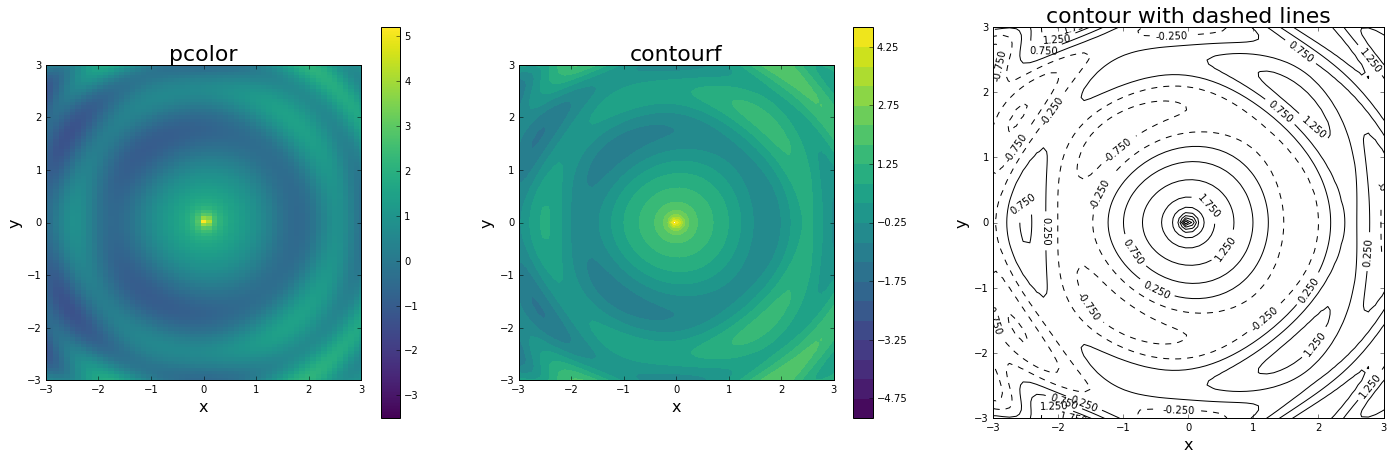

In [13]:
#2 Plot 2D function multiple ways
l = np.arange(-5.25, 5.25, 0.5)
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
fig = plt.figure(figsize=(24,7))

#pcolor
ax1 = fig.add_subplot(1, 3, 1, aspect='equal')
g = ax1.pcolormesh(X, Y, Z, linewidth=3, cmap='viridis', vmin=-3.5)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
#ax1.set_xtick([])
#ax1.set_ytick([])
ax1.set_title('pcolor', fontsize=22)
fig.colorbar(g)

#contourf
ax2 = fig.add_subplot(1, 3, 2, aspect='equal')
g = ax2.contourf(X, Y, Z, cmap='viridis', levels=l)
#ax2.set_xtick([])
#ax2.set_ytick([])
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('x', fontsize=16)
ax2.set_ylabel('y', fontsize=16)
ax2.set_title('contourf', fontsize=22)
fig.colorbar(g)

#contour(with dashed lines for negative values, solid lines for positive values)
ax3 = fig.add_subplot(1, 3, 3, aspect='equal')
#ax3.set_xtick([])
#ax3.set_ytick([])
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.set_xlabel('x', fontsize=16)
ax3.set_ylabel('y', fontsize=16)
ax3.set_title('contour with dashed lines', fontsize=22)
plt.rcParams['contour.negative_linestyle'] = 'dashed'
p = ax3.contour(X, Y, Z, colors='black', levels=l)
plt.clabel(p, fontsize=10, inline=1)


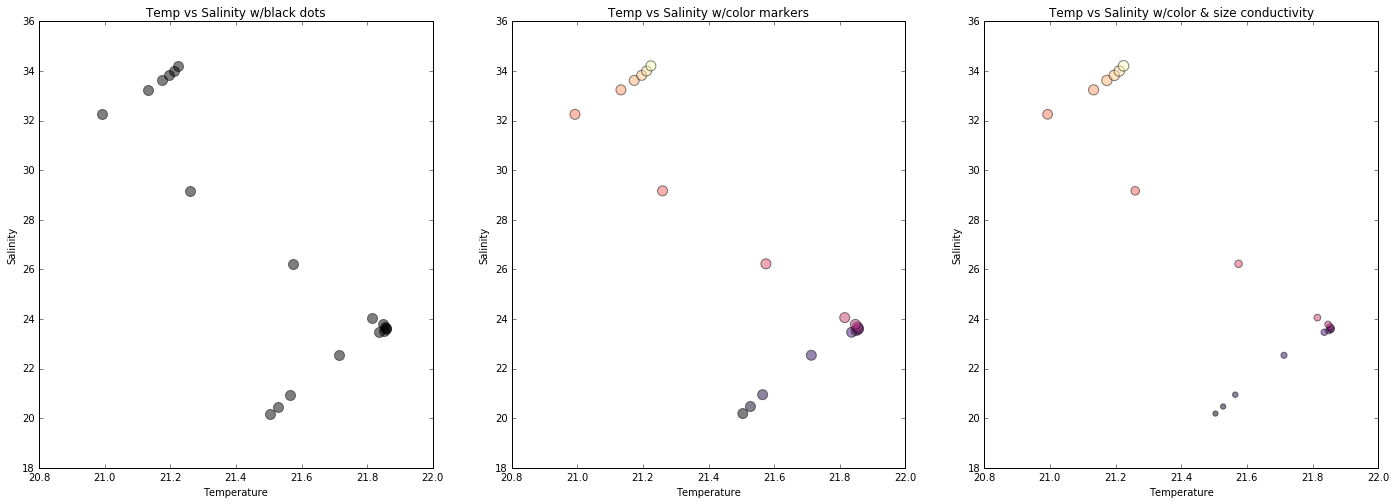

In [6]:
# 3 Read 2D data and make scatter plot
b = np.genfromtxt('../python4geosciences/data/MCH/m1004aa.cnv2', skip_header=57)

f = plt.figure(figsize=(24,8))
depth = b[:, 1]
temperature = b[:, 2]
salinity = b[:, 5]
conductivity = b[:, 4]

#plot temperature vs. salinity, using black dots to mark the data points
ax4 = f.add_subplot(1, 3, 1)
ax4.set_xlabel('Temperature')
ax4.set_ylabel('Salinity')
ax4.set_title('Temp vs Salinity w/black dots')
pt1 = ax4.scatter(temperature, salinity, s=100, c='k', alpha=0.5)
#f.colorbar(pt1)

#plot temperature vs. salinity, and color the markers with the depth
ax5 = f.add_subplot(1, 3, 2)
ax5.set_xlabel('Temperature')
ax5.set_ylabel('Salinity')
ax5.set_title('Temp vs Salinity w/color markers')
pt2 = ax5.scatter(temperature, salinity, s=100, c=depth, cmap='magma',alpha=0.5 )
#f.colorbar(pt2)

#plot temperature vs. salinity, color the markers with the depth, and then size the markers with another poperty of your choice from the file
ax6 = f.add_subplot(1, 3, 3)
ax6.set_xlabel('Temperature')
ax6.set_ylabel('Salinity')
ax6.set_title('Temp vs Salinity w/color & size conductivity')
pt3 = ax6.scatter(temperature, salinity, s=(conductivity)**3, c=depth, cmap='magma', alpha=0.5)
#f.colorbar(pt3)


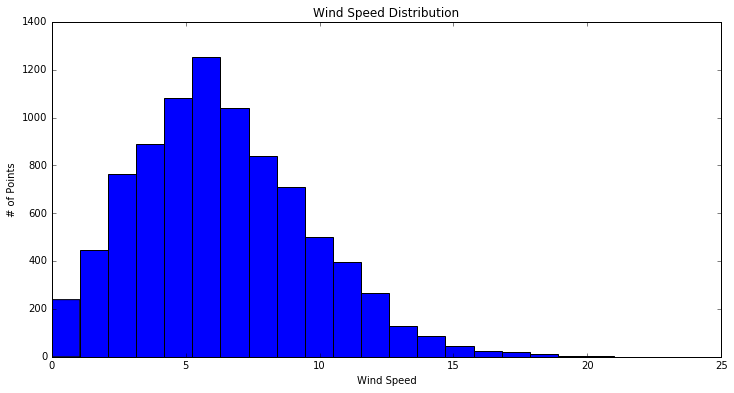

In [8]:
# 4 Histogram
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(wind_speed, bins=20)
ax.set_xlabel('Wind Speed')
ax.set_ylabel('# of Points')
ax.set_title('Wind Speed Distribution')

